<a href="https://colab.research.google.com/github/MarcosMomoArg/Coder-ds-74920/blob/main/Marcos_Momo_com_74920_vers2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Este conjunto de datos proporciona información sobre distintos hábitos de estudio, estilos de aprendizaje y factores externos, los cuales creemos influyen en el rendimiento de los estudiantes. Se cubren detalles sobre las horas de estudio de los mismos, participación en el aprendizaje en línea, calificaciones de los exámenes, porcentanjes de asistencia, nivel de estrés y otros factores que que se cree que afectan el éxito académico.
##Objetico :
##Analizar cómo diferentes factores influyen en el desempeño académico y comprender el impacto de los hábitos de estudio, los estilos de aprendizaje y las actividades externas.


##**1- Objetivo**
##Predcecir si un alumno va a obtener buenos resultados académicos (A) .

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import requests
#from google.colab import drive
#drive.mount('/content/drive/')

In [65]:
#df_Desempe_estudiantes = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/student_performance_large_dataset.csv')
#df_Desempe_estudiantes.head()


In [66]:


url = 'https://raw.githubusercontent.com/MarcosMomoArg/Coder-ds-74920/main/student_performance_large_dataset.csv'  # Updated URL
column_names = [ 'Student_ID','Age', 'Gender', 'Study_Hours_per_Week', 'Preferred_Learning_Style', 'Online_Courses_Completed', 'Participation_in_Discussions', 'Assignment_Completion_Rate (%)', 'Exam_Score (%)', 'Attendance_Rate (%)', 'Use_of_Educational_Tech', 'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)', 'Sleep_Hours_per_Night', 'Final_Grade']
response = requests.get(url)
response.raise_for_status()
df_Desempe_estudiantes = pd.read_csv(io.StringIO(response.text), names=column_names, header=0)  # Specify header=0 to use the first row as header
df_Desempe_estudiantes.drop(columns=['Student_ID'], inplace=True)
df_Desempe_estudiantes['Participation_in_Discussions'] = df_Desempe_estudiantes['Participation_in_Discussions'].map({'Yes': 1,'No': 0})
df_Desempe_estudiantes.head()

,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,18,Female,48,Kinesthetic,14,1,100,69,66,Yes,High,9,8,C
1,29,Female,30,Reading/Writing,20,0,71,40,57,Yes,Medium,28,8,D
2,20,Female,47,Kinesthetic,11,0,60,43,79,Yes,Low,13,7,D
3,23,Female,13,Auditory,0,1,63,70,60,Yes,Low,24,10,B
4,19,Female,24,Auditory,19,1,59,63,93,Yes,Medium,26,8,C


In [67]:
# Eliminamos valores nulos
df_Desempe_estudiantes.dropna()

,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,18,Female,48,Kinesthetic,14,1,100,69,66,Yes,High,9,8,C
1,29,Female,30,Reading/Writing,20,0,71,40,57,Yes,Medium,28,8,D
2,20,Female,47,Kinesthetic,11,0,60,43,79,Yes,Low,13,7,D
3,23,Female,13,Auditory,0,1,63,70,60,Yes,Low,24,10,B
4,19,Female,24,Auditory,19,1,59,63,93,Yes,Medium,26,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20,Male,30,Auditory,6,1,62,58,76,Yes,Medium,17,6,C
9996,23,Female,16,Visual,8,1,54,84,86,Yes,Medium,6,5,B
9997,26,Male,23,Visual,3,1,54,40,70,No,Medium,20,8,D
9998,18,Male,41,Reading/Writing,7,1,66,45,90,Yes,Low,6,8,D


In [68]:
#Eliminamos duplicados
df_Desempe_estudiantes.drop_duplicates(keep='first', inplace=True)

In [69]:
# Verificamos que no haya edades errones
df_Desempe_estudiantes[df_Desempe_estudiantes['Age'] > 100]


,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade


In [70]:
df_Desempe_estudiantes[df_Desempe_estudiantes['Age'] < 18]

,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade


##No hay valores errónes en edades

In [71]:
df_Desempe_estudiantes['Gender'].value_counts()

,count
Gender,
Female,4846
Male,4748
Other,406


In [72]:
#Sacmos filas que no contengan valores correctos del sexo del estudiante
df_Desempe_estudiantes = df_Desempe_estudiantes.query('Gender in ["Female","Male"]')

In [73]:
df_Desempe_estudiantes['Gender'].value_counts()

,count
Gender,
Female,4846
Male,4748


In [74]:
df_Desempe_estudiantes['Study_Hours_per_Week'] = df_Desempe_estudiantes['Study_Hours_per_Week'].astype(int)
df_Desempe_estudiantes['Online_Courses_Completed'] = df_Desempe_estudiantes['Online_Courses_Completed'].astype(int)
df_Desempe_estudiantes['Gender'] = df_Desempe_estudiantes['Gender'].astype(str)

In [75]:
%matplotlib inline

In [76]:
df_Desempe_estudiantes.dtypes

,0
Age,int64
Gender,object
Study_Hours_per_Week,int64
Preferred_Learning_Style,object
Online_Courses_Completed,int64
Participation_in_Discussions,int64
Assignment_Completion_Rate (%),int64
Exam_Score (%),int64
Attendance_Rate (%),int64
Use_of_Educational_Tech,object


In [77]:
#Pasamos nuestra variable objetivo a numerica, tomando las notas = A para determinar el éxito académico
df_Desempe_estudiantes['Final_Grade'] = df_Desempe_estudiantes['Final_Grade'].map({'A': 1,'B': 0, 'D': 0,'c': 0})

In [78]:
df_Desempe_estudiantes.describe()

,Age,Study_Hours_per_Week,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
count,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,7265.000000
mean,23.479675,27.116635,9.985303,0.600479,74.918699,70.178549,75.076923,14.943819,6.970294,0.352925
std,3.461611,13.004616,6.138630,0.489825,14.674865,17.659334,14.740697,9.032314,1.996623,0.477913
min,18.000000,5.000000,0.000000,0.000000,50.000000,40.000000,50.000000,0.000000,4.000000,0.000000
25%,20.000000,16.000000,5.000000,0.000000,62.000000,55.000000,62.000000,7.000000,5.000000,0.000000
50%,23.000000,27.000000,10.000000,1.000000,75.000000,70.000000,75.000000,15.000000,7.000000,0.000000
75%,27.000000,38.000000,15.000000,1.000000,88.000000,85.000000,88.000000,23.000000,9.000000,1.000000
max,29.000000,49.000000,20.000000,1.000000,100.000000,100.000000,100.000000,30.000000,10.000000,1.000000


##**Hipótesis Nula (H0):**
Los hábitos de estudio  (horas de estudio de los mismos, participación en el aprendizaje en línea, calificaciones de los exámenes, porcentanjes de asistencia, nivel de estrés y otros factores) no son suficientes para predecir éxito académico significativamente mejor que el azar.
##**Hipótesis Alternativa (H1):**
Es posible construir un modelo de clasificación (Random Forest) utilizando los hábitos de estudio, que prediga el exito académico con una precisión y AUC (Area Under Curve) significativamente superiores al 50% (azar).

In [79]:
df_Desempe_estudiantes['Final_Grade'].value_counts()

,count
Final_Grade,
0.0,4701
1.0,2564


##Distribución de la variable Objetico (Final:Grade)

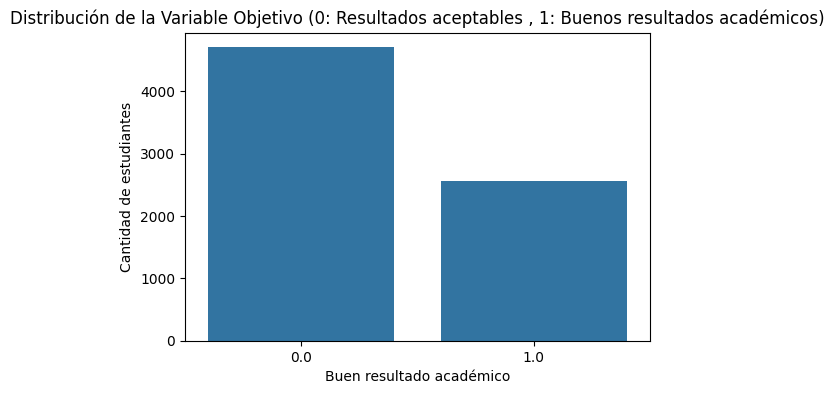

In [80]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Final_Grade', data=df_Desempe_estudiantes)
plt.title('Distribución de la Variable Objetivo (0: Resultados aceptables , 1: Buenos resultados académicos)')
plt.xlabel('Buen resultado académico')
plt.ylabel('Cantidad de estudiantes')
target_dist = df_Desempe_estudiantes['Final_Grade'].value_counts(normalize=True) * 100

## Debido a que uno de los resultados de nuestra variable objetivo se lleva casi el 65 porciento de los resultados, buscamos un modelo que prediga con una precisión > 85% .

Preparo las variabes numéricas, cuando complete el modelo tenía una precisión del ciento porciento , ahí me di cuanta de que el resultado de los examenes era sufieciente para predecir el desempeño academéco, por lo que lo excluí del modelo para analizar el resto de las variables

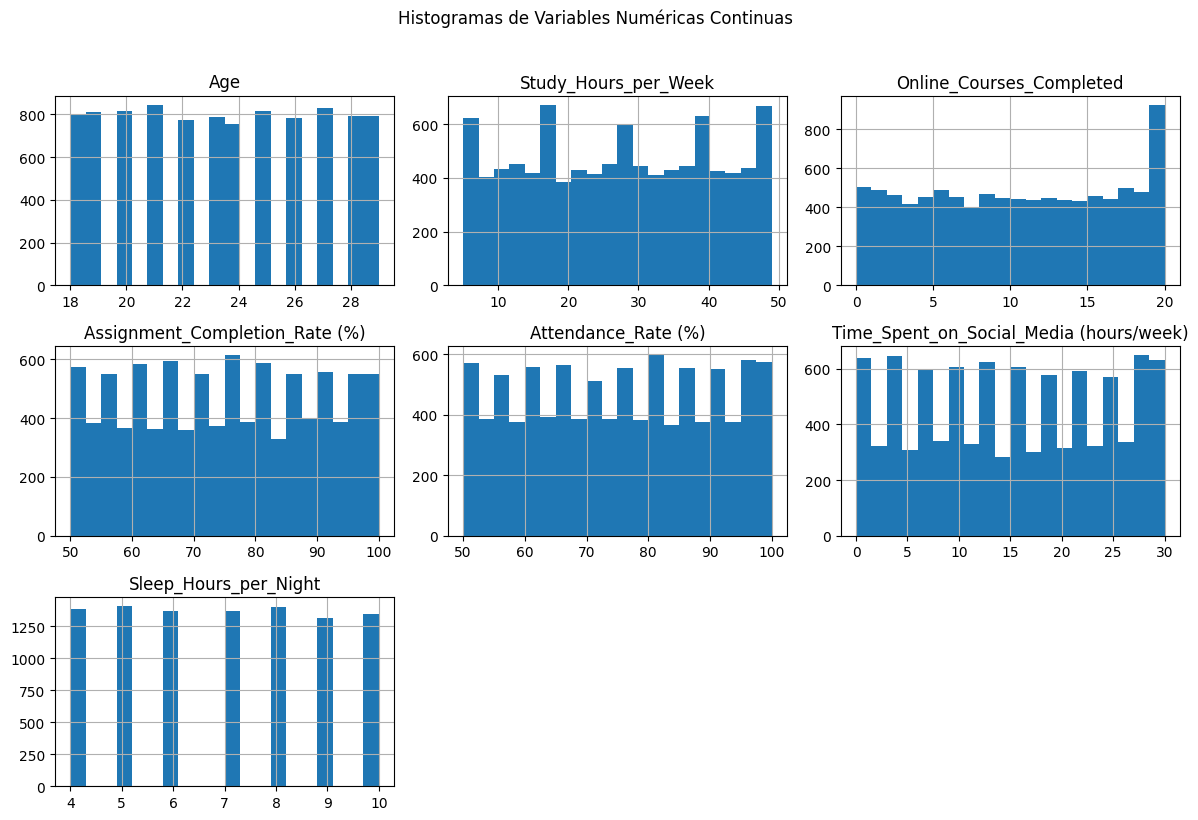

In [81]:
# Histogramas para variables continuas
numerical_features = df_Desempe_estudiantes.select_dtypes(include=np.number).columns # Trae nombre de columnas
numerical_features = numerical_features[numerical_features != 'Final_Grade'] # Excluye la variable objetivo
numerical_features = numerical_features.tolist()
numerical_features.remove('Participation_in_Discussions')
numerical_features.remove('Exam_Score (%)')
#numerical_features = numerical_features[numerical_features != 'Particepations_in_Discussions'] # la excluímos porque es una variable categorica
df_Desempe_estudiantes[numerical_features].hist(figsize=(12, 8), bins=20) #
plt.suptitle('Histogramas de Variables Numéricas Continuas', y=1.02)
plt.tight_layout()
plt.show()

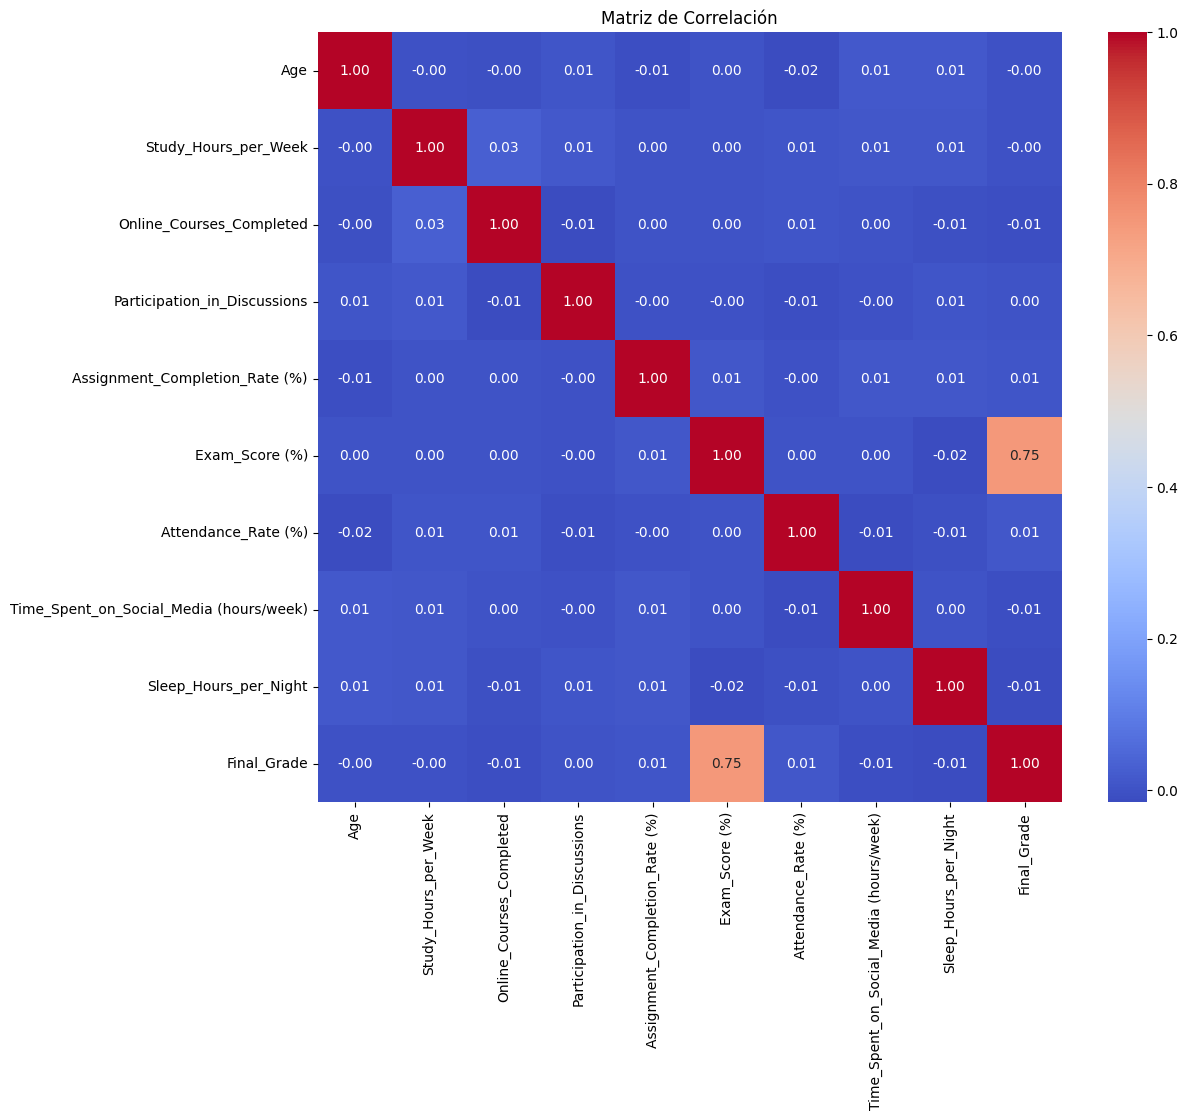

In [83]:
# Gráfico para ver la correlación de las variables
plt.figure(figsize=(12, 10))
numerical_features = df_Desempe_estudiantes.select_dtypes(include=np.number)
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


**Como era de esperar, hay una fuerte correlación entre el desempeño académico y la nota de los examenes, a mejor desempeño en los examenes, mejor desempeño academéco, el resto de las variables no muestran correlación**

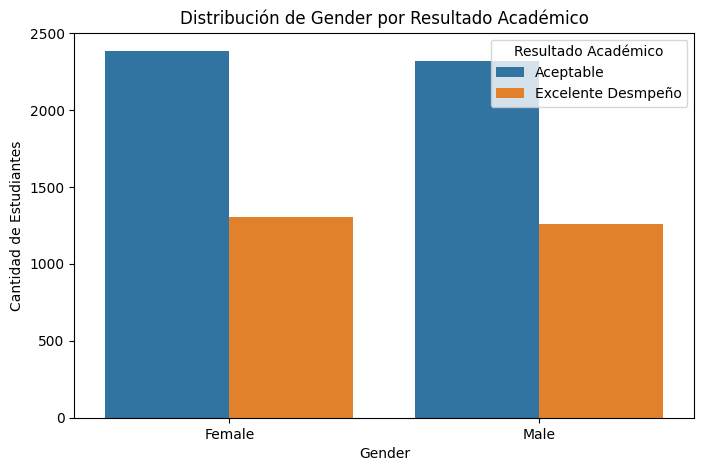

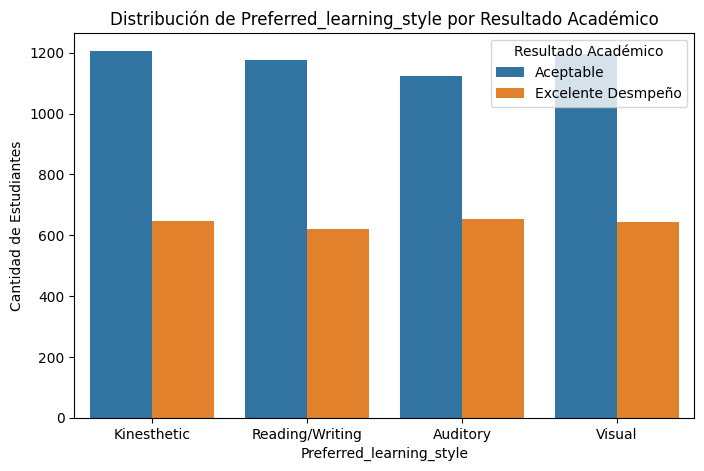

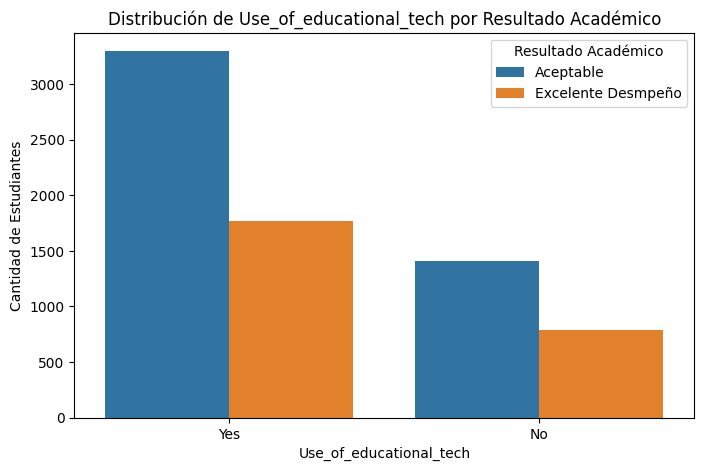

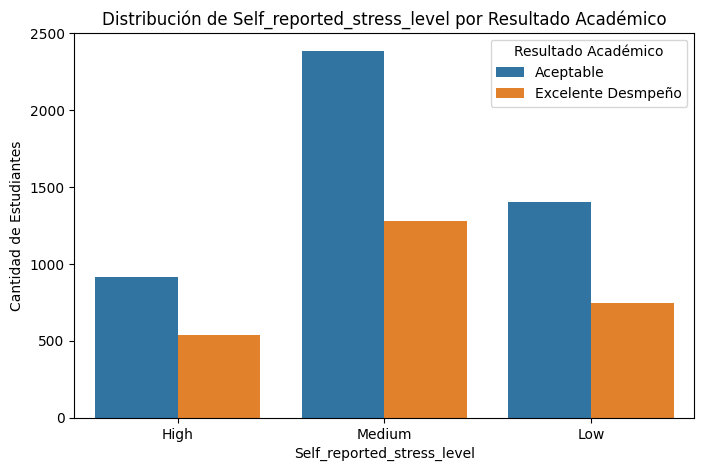

In [84]:
categorical_features = df_Desempe_estudiantes.select_dtypes(include=['object']).columns # Assuming 'object' dtype represents categorical features

for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df_Desempe_estudiantes, hue='Final_Grade') # Changed 'df' to 'df_Desempe_estudiantes' and 'target' to 'Final_Grade'
    plt.title(f'Distribución de {col.capitalize()} por Resultado Académico') # Changed title
    plt.xlabel(col.capitalize())
    plt.ylabel('Cantidad de Estudiantes') # Changed ylabel
    plt.legend(title='Resultado Académico', labels=['Aceptable','Excelente Desmpeño']) # Changed legend title and labels
    plt.show()

In [98]:
# Definir las características (X) y la variable objetivo (y)
#categorical_feature = ['Gender', 'Preferred_Learning_Style', 'Use_of_Educational_Tech', 'Self_Reported_Stress_Level']
#numerical_features = ['Age', 'Study_Hours_per_Week', 'Online_Courses_Completed', 'Participation_in_Discussions', 'Assignment_Completion_Rate (%)', 'Exam_Score (%)', 'Attendance_Rate (%)', 'Time_Spent_on_Social_Media (hours/week)', 'Sleep_Hours_per_Night']
categorical_feature = ['Gender', 'Preferred_Learning_Style', 'Use_of_Educational_Tech', 'Self_Reported_Stress_Level']
numerical_features = ['Age', 'Study_Hours_per_Week', 'Online_Courses_Completed', 'Assignment_Completion_Rate (%)', 'Attendance_Rate (%)', 'Time_Spent_on_Social_Media (hours/week)', 'Sleep_Hours_per_Night']
features = categorical_feature + numerical_features
target = 'Final_Grade'

print(f"\nCaracterísticas numéricas a escalar: {numerical_features}")
print(f"Características categóricas a codificar (OneHot): {categorical_features}")
print(f"Variable objetivo: {target}")
print("\n")


Características numéricas a escalar: ['Age', 'Study_Hours_per_Week', 'Online_Courses_Completed', 'Assignment_Completion_Rate (%)', 'Attendance_Rate (%)', 'Time_Spent_on_Social_Media (hours/week)', 'Sleep_Hours_per_Night']
Características categóricas a codificar (OneHot): Index(['Gender', 'Preferred_Learning_Style', 'Use_of_Educational_Tech',
       'Self_Reported_Stress_Level'],
      dtype='object')
Variable objetivo: Final_Grade




##Preprocesamiento de datos

In [99]:
X = df_Desempe_estudiantes[features]
y = df_Desempe_estudiantes[target]

In [100]:
# Crear el preprocesador usando ColumnTransformer

# 1. OneHotEncoder para las variables categóricas
# 2. StandardScaler para las variables numéricas continuas.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough')


In [101]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['Age', 'Study_Hours_per_Week',
                                  'Online_Courses_Completed',
                                  'Assignment_Completion_Rate (%)',
                                  'Attendance_Rate (%)',
                                  'Time_Spent_on_Social_Media (hours/week)',
                                  'Sleep_Hours_per_Night']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Gender', 'Preferred_Learning_Style', 'Use_of_Educational_Tech',
       'Self_Reported_Stress_Level'],
      dtype='object'))])

##**División de Datos**

In [102]:
from sklearn.model_selection import train_test_split
df_Desempe_estudiantes = df_Desempe_estudiantes.dropna(subset=[target])
X = df_Desempe_estudiantes[features]
y = df_Desempe_estudiantes[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [103]:
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño del conjunto de prueba (y_test): {y_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (5448, 11)
Tamaño del conjunto de prueba (X_test): (1817, 11)
Tamaño del conjunto de entrenamiento (y_train): (5448,)
Tamaño del conjunto de prueba (y_test): (1817,)


In [104]:
print("\nDistribución de la variable objetivo en Train vs Test:")
print(f"Train: \n{y_train.value_counts(normalize=True)}")
print(f"Test: \n{y_test.value_counts(normalize=True)}")


Distribución de la variable objetivo en Train vs Test:
Train: 
Final_Grade
0.0    0.647026
1.0    0.352974
Name: proportion, dtype: float64
Test: 
Final_Grade
0.0    0.647221
1.0    0.352779
Name: proportion, dtype: float64


##Construcción y Entrenamiento del Modelo

In [105]:
from sklearn.pipeline import Pipeline  # Import the Pipeline class
from sklearn.ensemble import RandomForestClassifier  # Import the RandomForestClassifier class

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=1000, random_state=42, class_weight='balanced'))])

In [106]:

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Study_Hours_per_Week',
                                                   'Online_Courses_Completed',
                                                   'Assignment_Completion_Rate '
                                                   '(%)',
                                                   'Attendance_Rate (%)',
                                                   'Time_Spent_on_Social_Media '
                                                   '(hours/week)',
                                                   'Sleep_Hours_per_Night']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'Preferred_Learning_Style', 'Use_of_Educational_Tech',
       'Self_Reported_Stress_Level'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=1000, random_state=42))])

## Evaluación del modelo

In [107]:
# Realizar predicciones en el conjunto de prueba
from sklearn.pipeline import Pipeline  # Import the Pipeline class
from sklearn.ensemble import RandomForestClassifier  # Import the RandomForestClassifier class
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

y_pred = model_pipeline.predict(X_test)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]

In [108]:
from sklearn.metrics import accuracy_score # Import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"--- Accuracy Score ---")
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")

--- Accuracy Score ---
Accuracy en el conjunto de prueba: 0.6417


##**Matriz de confusión**


--- Matriz de Confusión ---


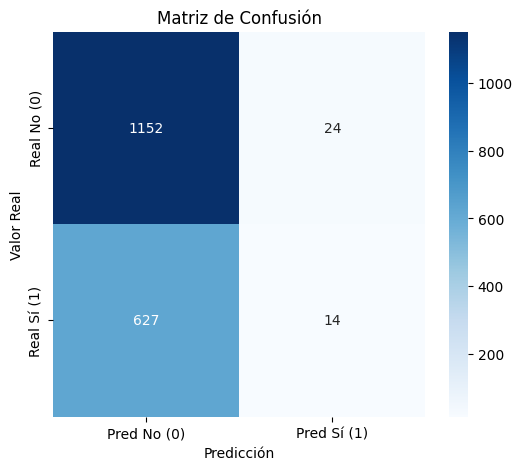

Verdaderos Negativos (TN): 1152
Falsos Positivos (FP): 24
Falsos Negativos (FN): 627
Verdaderos Positivos (TP): 14


In [109]:
from sklearn.metrics import confusion_matrix
print("\n--- Matriz de Confusión ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred No (0)', 'Pred Sí (1)'], yticklabels=['Real No (0)', 'Real Sí (1)'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()
print(f"Verdaderos Negativos (TN): {cm[0,0]}")
print(f"Falsos Positivos (FP): {cm[0,1]}")
print(f"Falsos Negativos (FN): {cm[1,0]}")
print(f"Verdaderos Positivos (TP): {cm[1,1]}")

In [110]:
from sklearn.metrics import classification_report # Import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.98      0.78      1176
         1.0       0.37      0.02      0.04       641

    accuracy                           0.64      1817
   macro avg       0.51      0.50      0.41      1817
weighted avg       0.55      0.64      0.52      1817



In [111]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

##**Curva ROC y AUC**

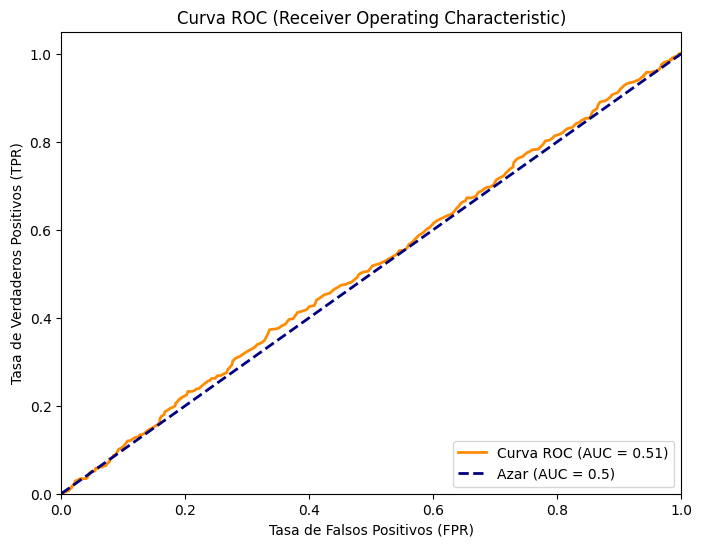

In [112]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.show()

##**Análisis de Importancia de Características**

In [113]:
# Para obtener la importancia, necesitamos acceder al clasificador DENTRO del pipeline
rf_classifier = model_pipeline.named_steps['classifier']
importances = rf_classifier.feature_importances_

In [114]:
# Obtener el transformador OneHotEncoder del preprocesador
ohe_transformer = model_pipeline.named_steps['preprocessor'].transformers_[1][1]
# Obtener las categorías de las características codificadas
ohe_categories = ohe_transformer.categories_

In [115]:
ohe_categories

[array(['Female', 'Male'], dtype=object),
 array(['Auditory', 'Kinesthetic', 'Reading/Writing', 'Visual'],
       dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['High', 'Low', 'Medium'], dtype=object)]

In [116]:
# Crear los nombres de las características codificadas (ej: cp_0, cp_1, sex_0, sex_1...)
# Nota: Asegúrate de que el orden en 'categorical_features_for_encoding' coincide con el usado en ColumnTransformer
ohe_feature_names = []
for i, col in enumerate(categorical_feature): # Reemplazar 'categorical_features_for_encoding' con 'categorical_feature'
    for category in ohe_categories[i]:
        ohe_feature_names.append(f"{col}_{category}")


In [117]:
ohe_feature_names

['Gender_Female',
 'Gender_Male',
 'Preferred_Learning_Style_Auditory',
 'Preferred_Learning_Style_Kinesthetic',
 'Preferred_Learning_Style_Reading/Writing',
 'Preferred_Learning_Style_Visual',
 'Use_of_Educational_Tech_No',
 'Use_of_Educational_Tech_Yes',
 'Self_Reported_Stress_Level_High',
 'Self_Reported_Stress_Level_Low',
 'Self_Reported_Stress_Level_Medium']

In [118]:
final_feature_names = numerical_features + ohe_feature_names


Importancia de las características según Random Forest:
                                     Feature  Importance
3             Assignment_Completion_Rate (%)    0.139070
4                        Attendance_Rate (%)    0.138641
1                       Study_Hours_per_Week    0.135424
5    Time_Spent_on_Social_Media (hours/week)    0.126171
2                   Online_Courses_Completed    0.116298
0                                        Age    0.097049
6                      Sleep_Hours_per_Night    0.076895
12           Preferred_Learning_Style_Visual    0.016488
11  Preferred_Learning_Style_Reading/Writing    0.016223
10      Preferred_Learning_Style_Kinesthetic    0.016213
17         Self_Reported_Stress_Level_Medium    0.016191
7                              Gender_Female    0.016026
8                                Gender_Male    0.015948
9          Preferred_Learning_Style_Auditory    0.015332
16            Self_Reported_Stress_Level_Low    0.015168


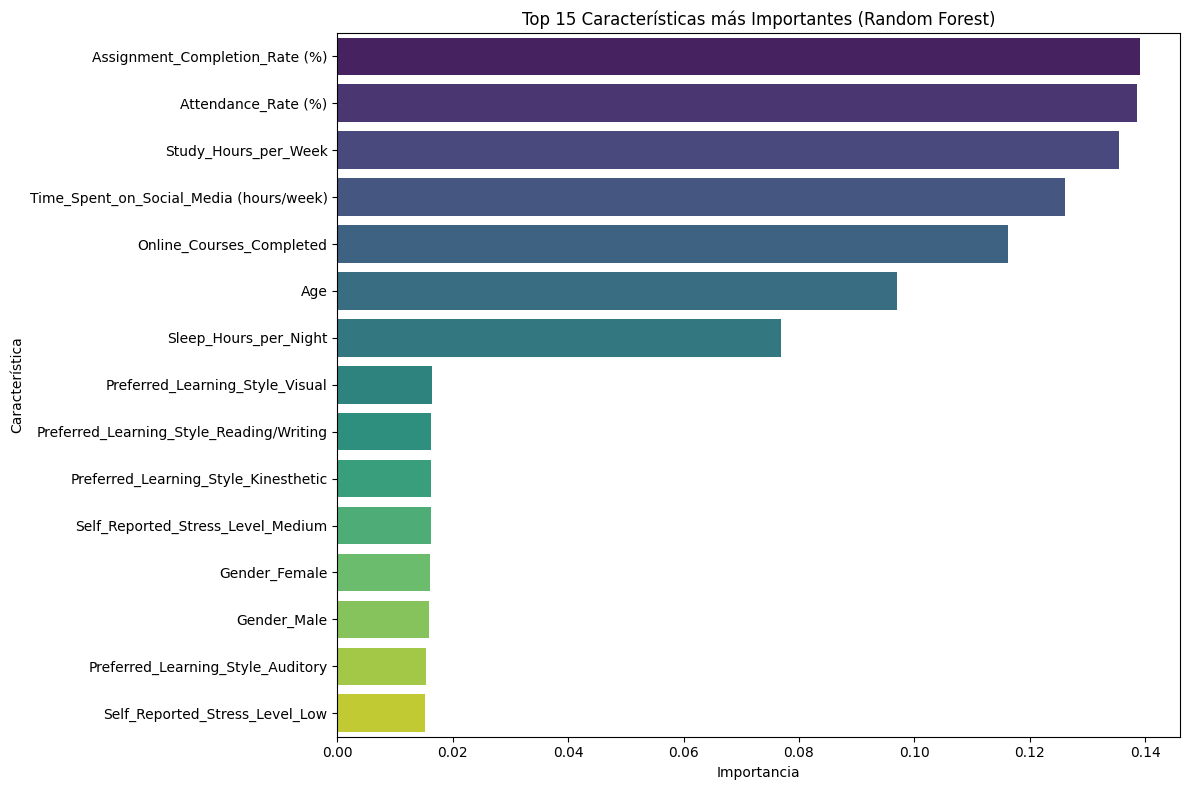

In [119]:
if len(importances) == len(final_feature_names):
    feature_importance_df = pd.DataFrame({'Feature': final_feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print("Importancia de las características según Random Forest:")
    print(feature_importance_df.head(15)) # Mostrar las 15 más importantes

    # Graficar la importancia de las características
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis', hue='Feature')
    plt.title('Top 15 Características más Importantes (Random Forest)')
    plt.xlabel('Importancia')
    plt.ylabel('Característica')
    plt.tight_layout()
    plt.show()

##Como era de esperar vemos que características como horas de estudio , asistencia y trabajos completados tienen una fuerte influencia en el desempeño académico, pero ademas notamos que la vida social es ,uy importante para lograr dicho fin.

##**Conclusiones**

##La hipótesis alternativa (H1) planteaba que era posible predecir si un estudiante lograría un excelente rendimiento académico con una precisión superior al 85% y un AUC mayor a 0.5, utilizando las características proporcionadas y un modelo de Random Forest.

##En una primera prueba, utilicé todas las variables disponibles y obtuve un modelo con una precisión del 100%. Sin embargo, me di cuenta de que era necesario excluir la variable "Exam-Score (%)", ya que su inclusión es lógicamente impacta directamente en el desempeño académico del estudiante.

##El modelo resultante, tras la exclusión de dicha variable, no alcanzó a confirmar la hipótesis alternativa H1. Por lo tanto, podemos concluir que las características estudiadas no son suficientes para predecir si un estudiante tendrá un buen resultado académico.
